# ML: Unsupervised algorithm - Apriori - Shopping Basket

## Introduction

Let's perform a shopping basket analysis with the Apriori algorithm, using the groceries dataset (https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset) from KAGGLE. The dataset was published by Heeral Dedhia in 2020 under a general public licence. The dataset has 38765 rows of grocery shop purchase records.

__Please note__: the Apriori algorithm is not implemented in Sklearn, but in the mlxtend library (http://rasbt.github.io/mlxtend/), a library with many interesting functions for data analysis and machine learning routines and, in particular, the Apriori algorithm.

## 1. Import of libraries

In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules # Use it to generate the rules or patterns between products.
from mlxtend.preprocessing import TransactionEncoder # Use it to transform the dataset into a logical matrix. 
                                                    # Each column represents an item and each row represents a record. 
                                                    # Being TRUE if the record occurs and FALSE if it does not occur.

## 2. Load datasets

We load the dataset with read_csv and do a quick scan with the commands head and info: we see that it has 3 columns:

* Member_number: customer
* Date: date of purchase
* ItemDescription: product purchased

In [2]:
file='Groceries_dataset.csv'
df = pd.read_csv(file)
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 3. Dataset analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Analyse the content of the dataset from the nunique command and see that there are 3898 different customers who have bought on 728 different days and a total of 167 different products.

In [4]:
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

Let's see what types of products are included in the itemDescription variable. We see that the most purchased product is whole_milk, followed by other vegetables and rolls/buns.

In [5]:
all_products=df['itemDescription'].value_counts()
all_products

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

## 4. Models training

To apply the Apriori model we need to generate a dataset where we have for each consumer and date all the products purchased.
Generate the appropriate dataset for rule calculation.

* Group the purchases by consumer and date.
* From each purchase, we must obtain the list of different products it contains.

In [6]:
df.loc[df['Member_number']==2552].sort_values(by='Date')

,Member_number,Date,itemDescription
1,2552,05-01-2015,whole milk
16150,2552,05-01-2015,tropical fruit
36089,2552,05-01-2015,chocolate
11292,2552,08-10-2014,butter
27441,2552,08-10-2014,root vegetables
12226,2552,11-07-2014,pot plants
28375,2552,11-07-2014,shopping bags
38452,2552,11-07-2014,coffee
14417,2552,19-02-2014,other vegetables
30566,2552,19-02-2014,chocolate


In [7]:
transactions = df.groupby(['Member_number','Date'])['itemDescription'].unique().reset_index()
transactions

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


With the transactions dataset created we apply the TransactionEncoder function to generate the logical matrix where we have for each consumer/date the value True or False in the purchased products.
We apply the method to generate the logical matrix.

In [8]:
te = TransactionEncoder()
encoder = te.fit(transactions.itemDescription)
onehot = encoder.transform(transactions.itemDescription)
dfonehot = pd.DataFrame(onehot, columns=encoder.columns_)
dfonehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The Apriori model has several parameters:

* min_support: a value between 0 and 1 for minimum support for the returned element sets.
* use_colnames: if True returns the name of the variables in the output dataframe.
* max_len: maximum length of the generated element sets. Default is None, meaning that all possible sets are generated.
* verbose: integer value greater than 0, default is 0, if >=1 it shows the number of combinations found.
* low_memory: default is False, if True it looks for combinations above the min_support, this option is advisable only for large datasets.

We apply the algorithm to extract those itemsets, including single itemsets, that have been purchased at least 50 times. In a real case, this value would possibly be low considering the total number of transactions, so we use 50 so that a sufficient number of itemsets and association rules appear in the results, although we will focus on those with a single antecedent to identify the strongest rules.
We apply a minimum support of 50/38765 = 0.0013 e.g.

In [9]:
frequent_itemsets = apriori(dfonehot, min_support=50/len(df), use_colnames=True, verbose=1)

frequent_itemsets.sort_values('support',ascending=False)

Processing 16947 combinations | Sampling itemset size 3


,support,itemsets
138,0.157923,(whole milk)
85,0.122101,(other vegetables)
101,0.110005,(rolls/buns)
115,0.097106,(soda)
139,0.085879,(yogurt)
...,...,...
349,0.001337,"(flour, whole milk)"
221,0.001337,"(root vegetables, brown bread)"
359,0.001337,"(tropical fruit, frankfurter)"
369,0.001337,"(pip fruit, frozen vegetables)"


555 rules have been found.

Apply the function association_rules to generate the rules and calculate the support, confidence and confidence improvement (lift). The parameters of the function are:

* metric: this is the metric to be used to check whether the rule is significant or not. By default it is 'confidence' and can take the values 'support', 'confidence', 'lift', 'leverage', or 'conviction'. The most commonly used are support, confidence or lift.
* min_threshold: is the minimum threshold for evaluating the selected metric.
* support_only: default is False. It is useful to use it when the dataset is not complete and can generate NaNs, in this case it speeds up the process as it does not use all the metrics.
 
We will use the lift metric and with a minimum value of 1.5 and order it descending.

In [10]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
10,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
8,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
9,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
2,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
6,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
11,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596
1,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704
0,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129


And draw the list in descending order according to confidence and lift of the rules.

In [11]:
rules=rules.sort_values(['confidence','lift'],ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
8,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
7,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
1,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081


Select those antecedents with a single product to make the selection of the rule easier.

In [12]:
a = rules["antecedents"].apply(lambda x: len(x))

rules = rules[a == 1]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
4,(napkins),(pastry),0.022121,0.051728,0.001738,0.078550,1.518529,0.000593,1.029109
5,(pastry),(napkins),0.051728,0.022121,0.001738,0.033592,1.518529,0.000593,1.011869
2,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
0,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129
10,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
9,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
11,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596


Sort it by confidence and lift, we will have the most influential rules.

In [13]:
rules1=rules.sort_values(['confidence','lift'],ascending=False)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
4,(napkins),(pastry),0.022121,0.051728,0.001738,0.078550,1.518529,0.000593,1.029109
5,(pastry),(napkins),0.051728,0.022121,0.001738,0.033592,1.518529,0.000593,1.011869
2,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726


Let's visualise these rules with a scatter plot:

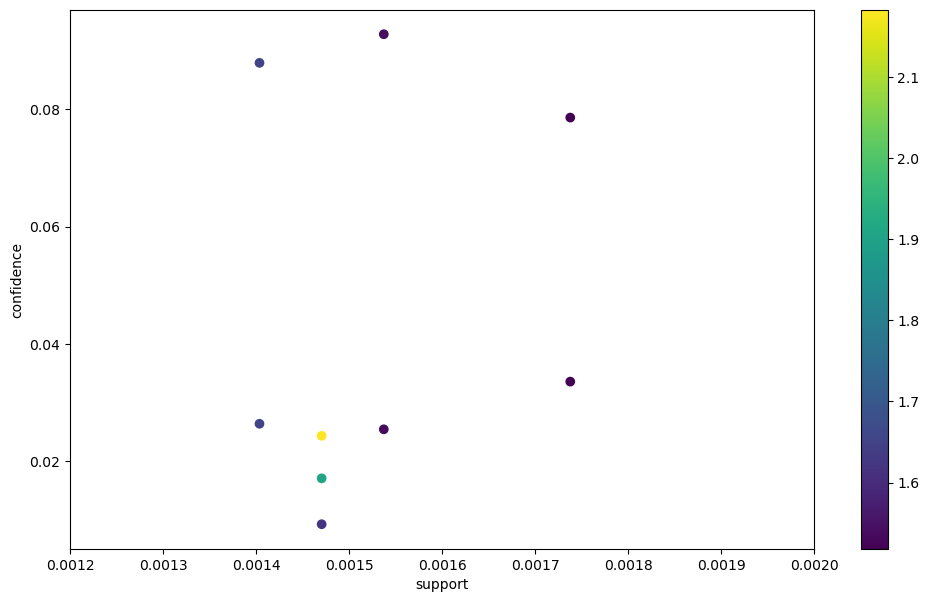

In [14]:
plt.figure(figsize=(12, 7))

plt.scatter(rules1["support"], rules1["confidence"], c=rules1["lift"])
plt.xlabel('support')
plt.ylabel('confidence')
plt.xlim([0.0012, 0.0020])
plt.colorbar()
plt.show()

See that the most significant rules to recommend are:

* beverage => sausages
* specialty chocolate => citrus fruit
* napkins => pastry